## Imports



In [ ]:
%run Library_Imports.ipynb

## Load Data

This Data was provided pre-precessed but can be found at: 

https://www.kaggle.com/datasets/uciml/adult-census-income

In [ ]:
train_data = pd.read_csv('adult.data', sep=",", header=None, skipinitialspace=True)


In [ ]:
test_data = pd.read_csv('adult.test', sep=",", skiprows=1, header=None, skipinitialspace=True)


In [ ]:
print(len(train_data))
print(len(test_data))

# because test data is half of that of training - split it into two randomly shuffled sets of test and eval 

32561
16281


Add column headings

In [ ]:
column_headers = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 
                  'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 
                  'native-country', 'earnings']

In [ ]:
train_data.columns = column_headers
test_data.columns = column_headers

## Correlation of Features
This needs to be performed on numerical representations only so we one hot encode categorical columns 

In [ ]:
train_data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
earnings          object
dtype: object

#### Dataset cleaning:

- Remove NaN values 
- Filter data into numerical and categorical datasets - we need to encode the categorical data in order to visualise

In [ ]:
corr_data = train_data.dropna()
categorical_data = corr_data.select_dtypes(include=['object'])
numerical_data = corr_data.select_dtypes(exclude=['object'])

In [ ]:
# Load encoder and encode the data 
encoder = LabelEncoder()
categorical_data = categorical_data.apply(encoder.fit_transform)


In [ ]:
# Re-assign the original dataframe - concatenating numerical and encoded categorical data
corr_data = pd.concat([numerical_data, categorical_data], axis=1)

### Correlation Plot

In [ ]:
train_corr = corr_data.corr()

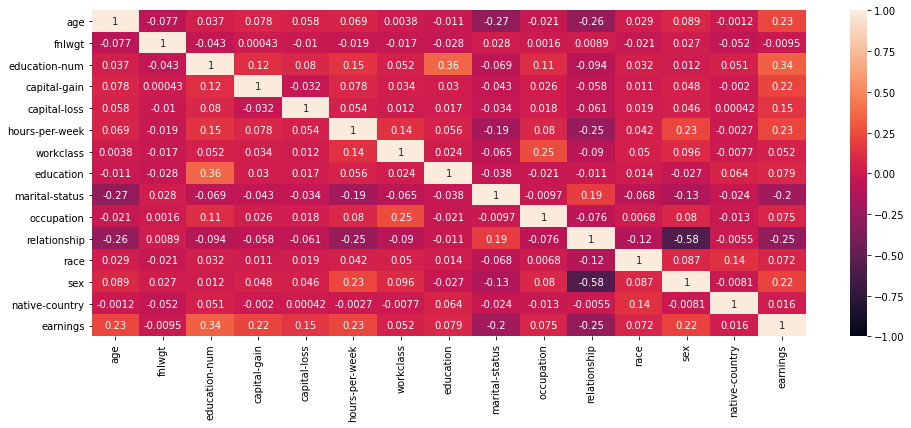

In [ ]:
plt.figure(figsize=(16, 6))

sns.heatmap(train_corr, vmin=-1, vmax=1, annot=True);

Based on the correlation plot and analysing how earnings relates to the other features including the protected attributes, it is clear that some have more effect than others. 

Protected Attribute Correlation: 


1.   Marital-Status: -0.2
2.   Relationship: -0.25
3.   Race: 0.072
4.   Sex: 0.22
5.   Native-Country: 0.016

It appears that for protected attributes, i.e. features that may not be used as the basis for decisions due to bias, that Marital-Status, Relationship and Sex are the 3 highest correlated to earnings. As there are no two protected attributes that can only excluded without including a high correlated attribute the assumption can be made to exclude all in a best attempt at fairness. Even those of Race and Native Country are excluded on the assumption that these are still highly protected attributes, rather that the data is biased.






## Analyse Distribution across Protected Attributes

### Earnings

##### Outcome: 

There is a large skew in the data to earnings of <=50K

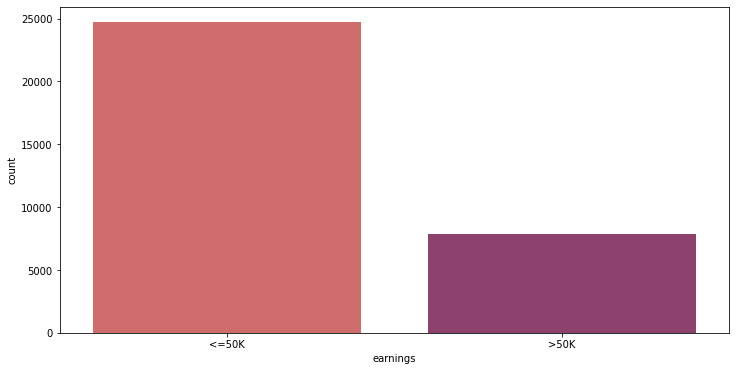

In [ ]:
plt.figure(figsize=(12, 6))

earnings = sns.countplot(x="earnings", data=train_data, palette="flare")

### Marital-Status

##### Outcome: 

Large proportion of people are either in a marriage/civial partnership or never married.

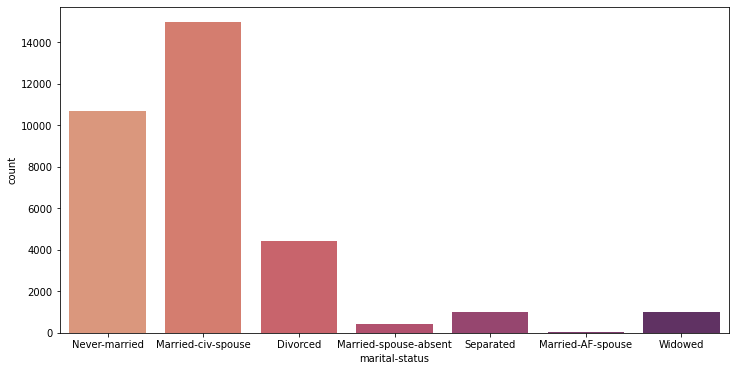

In [ ]:
plt.figure(figsize=(12, 6))

marital = sns.countplot(x="marital-status", data=train_data, palette="flare")

### Relationship

##### Outcome: 

Most noted their relationship is that they have a Husband, followed by a partner not being in the family.

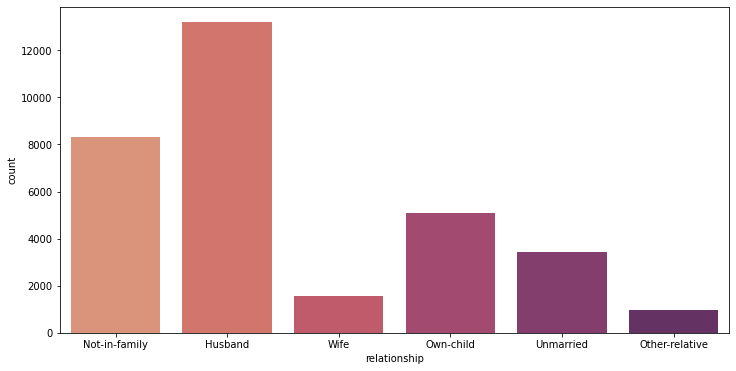

In [ ]:
plt.figure(figsize=(12, 6))

relationship = sns.countplot(x="relationship", data=train_data, palette="flare")

### Race

##### Outcome:  

The dataset is highly skewed towards those of White Race.

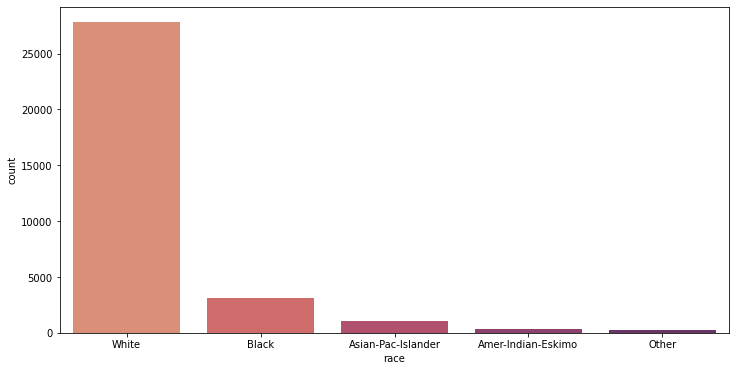

In [ ]:
plt.figure(figsize=(12, 6))

race = sns.countplot(x="race", data=train_data, palette="flare")

### Sex

##### Outcome: 

The data is highly skewed towards Males.

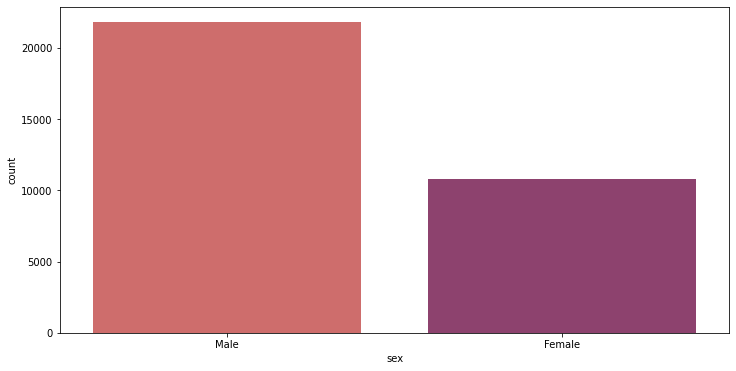

In [ ]:
plt.figure(figsize=(12, 6))

sex = sns.countplot(x="sex", data=train_data, palette="flare")

### Native-Country

##### Outcome: 

There is a high bias towards those native to the US. The first 55 Native Countries are shown.

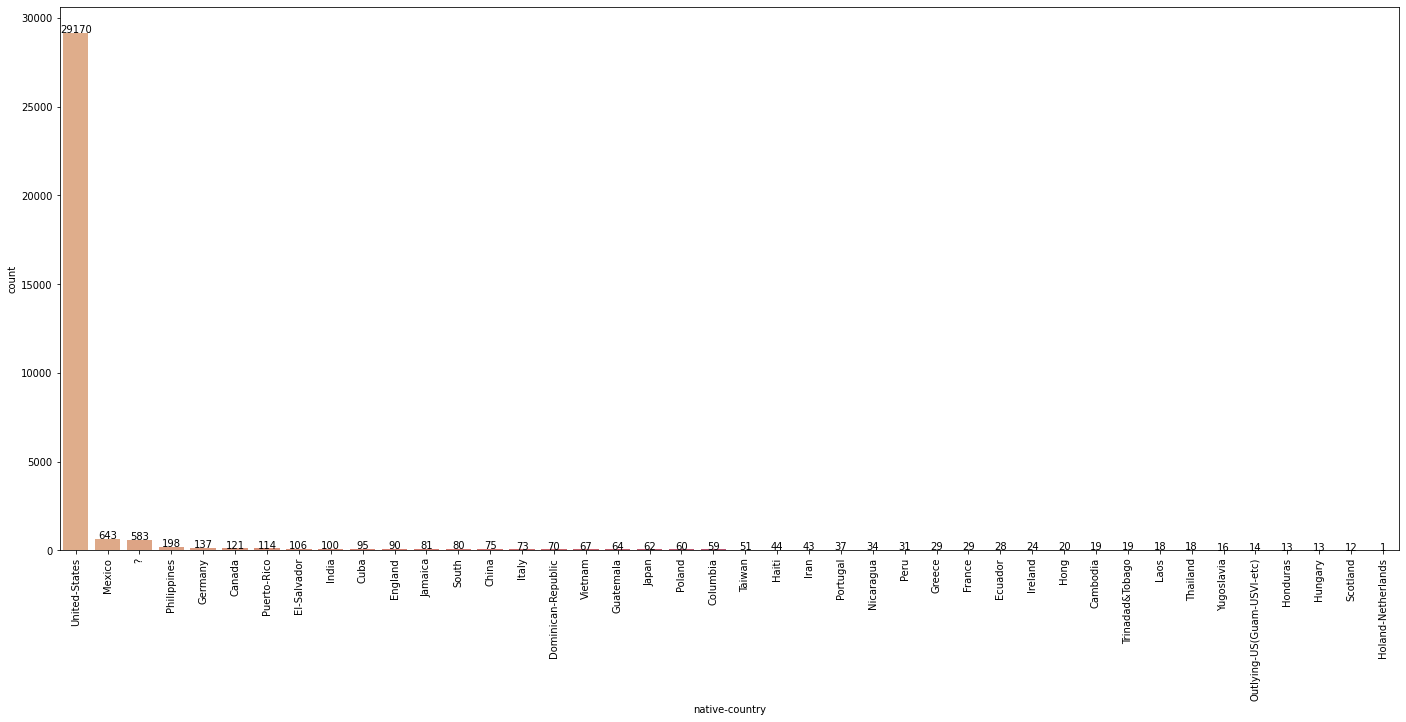

In [ ]:
plt.figure(figsize=(24, 10))
values=train_data['native-country'].value_counts().values

native = sns.countplot(x="native-country", data=train_data, palette="flare", 
                       order=train_data.value_counts('native-country').iloc[:55].index,
                       )
native.set_xticklabels(native.get_xticklabels(), rotation=90)

for i, p in enumerate(native.patches):
    height = p.get_height()
    native.text(p.get_x()+p.get_width()/2., height + 0.1, values[i],ha="center")

### Overall Visualisation Outcome 

Those protected features with high correlations can be said to be due to the skew in the data towards one class within the category. For example, we could assume that the high correlation with earnings and sex are due to the majority male samples in the data. We can also assume that the low correlation for Native Country and Race are due to the majority of the samples being of White Race and US Natives. 

## Visualisation of Target Variable Against Features 

Plotting with density plots to analyse the distribution of earnings to the target variable. 

##### From here 0 = <=50k and 1 = > 50K

In [ ]:
# Split the dataset into >=50K and <=50K
train_data['income'] = train_data['earnings']
train_data.income = train_data.income.map({'<=50K': 0, '>50K': 1})

data_over50k=train_data[train_data['income']==1]
data_less50k= train_data[train_data['income']==0]

### Age

##### Outcome:  

Shows that age is a factor to the earnings - those under 30 are less likely to earn greater than 50K. Can see this increase as age increases past 30.

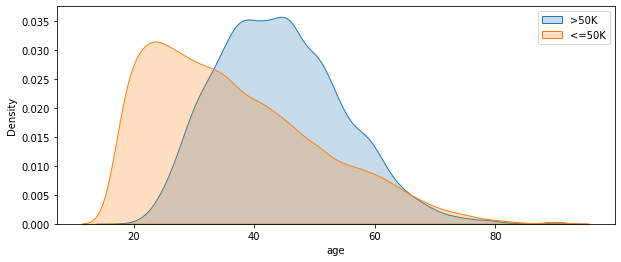

In [ ]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(111)

sns.kdeplot(data_over50k['age'], label = '>50K', shade=True, ax=ax1, palette="flare")
sns.kdeplot(data_less50k['age'], label = '<=50K', shade=True, ax=ax1, palette="flare")

#Legend
line_labels = [">50K", "<=50K"]
ax1.legend(
    loc="upper right",
    labels=line_labels)     


### Years in Education 

##### Outcome: 

The more years spent in education affects the likihood of earning >50k

In [2]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(111)

sns.kdeplot(data_over50k['education-num'], label = '>50K', shade=True, ax=ax1)
sns.kdeplot(data_less50k['education-num'], label = '<=50K', shade=True, ax=ax1)

#Legend
line_labels = [">50K", "<=50K"]
ax1.legend(
    loc="upper right",
    labels=line_labels)


NameError: name 'plt' is not defined

### Hours Per Week

##### Outcome: 

There is no large signifiance in hours per week to earnings, this can be said that salaries are yearly and are based on a contractual set of hours

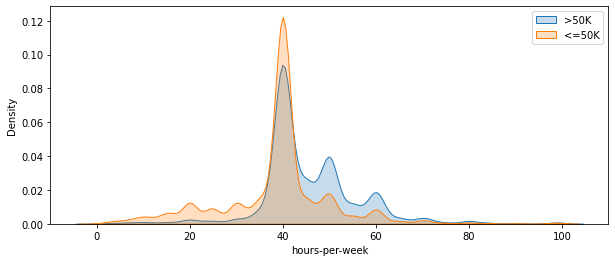

In [ ]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(111)

sns.kdeplot(data_over50k['hours-per-week'], label = '>50K', shade=True, ax=ax1)
sns.kdeplot(data_less50k['hours-per-week'], label = '<=50K', shade=True, ax=ax1)

#Legend
line_labels = [">50K", "<=50K"]
ax1.legend(
    loc="upper right",
    labels=line_labels)

### Captial-Gain

##### Outcome: 

There is a large spike for those earning <=50K around zero, meaning that the majority of people in this category had no capital gains to declare on the Census. For those earning >50K there are some who declared capital gains, this makes sense as those that earn more often have the financial ability to invest. 

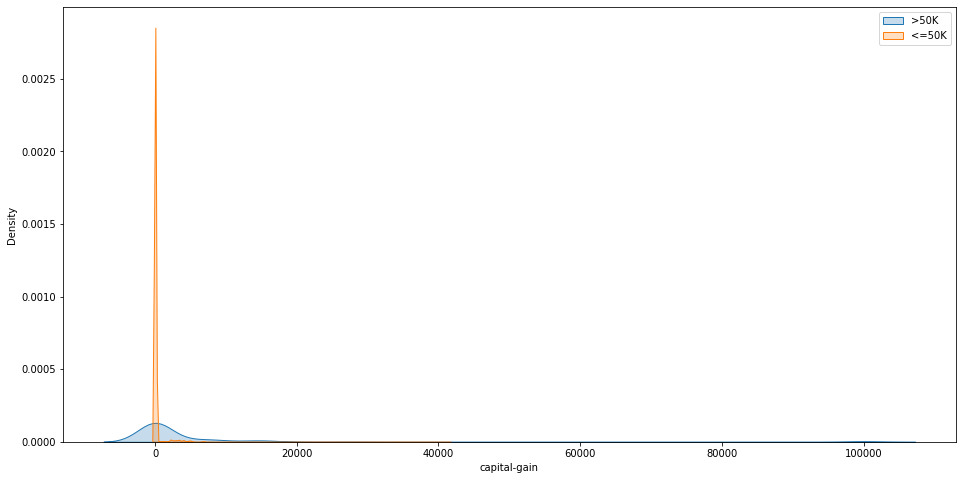

In [ ]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(111)

sns.kdeplot(data_over50k['capital-gain'], label = '>50K', shade=True, ax=ax1)
sns.kdeplot(data_less50k['capital-gain'], label = '<=50K', shade=True, ax=ax1)

#Legend
line_labels = [">50K", "<=50K"]
ax1.legend(
    loc="upper right",
    labels=line_labels)

### Workclass 

##### Outcome: 

The dark purple (1 i.e. >50K) shows that you are more likely to earn this in the private sector, however it is seen that the majority of those earning <=50K also work in the private sector. This could be correlated to years in education. 

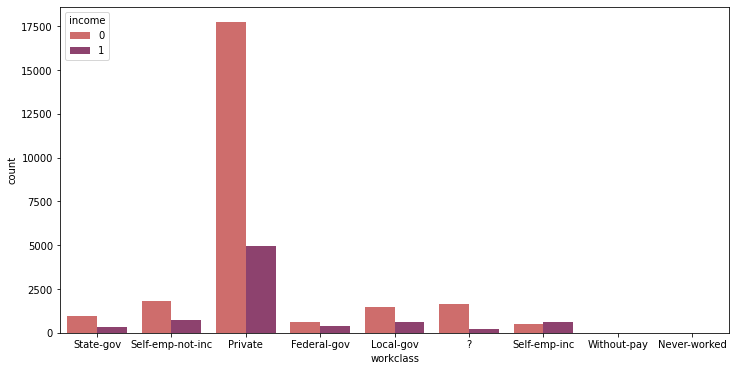

In [ ]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

ax = sns.countplot(x="workclass", hue="income", data=train_data, palette = "flare")

# orange/0 <=50K
# purple/1 > 50K

### Married

##### Outcome: 

It is more likely to earn <50k if you are unmarried which could correlate with the younger age group who could be earning less due to being early in their career. This is also seen that those that are married are more likely to earn >50K which could correlate with age.  

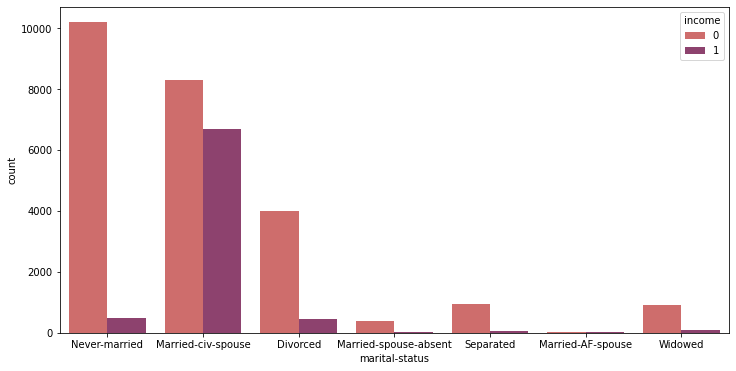

In [ ]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

ax = sns.countplot(x="marital-status", hue="income", data=train_data, palette = "flare")


### Race

##### Outcome: 

The dataset itself is naturally biased disprortionately towards those who are those of White Race, however it is clear that the majority still earn <=50K. 

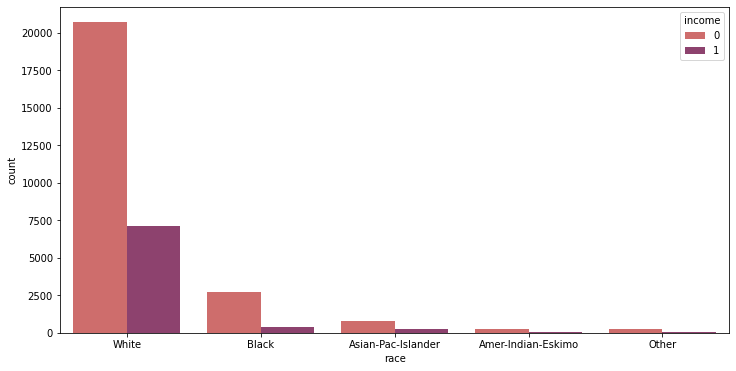

In [ ]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

ax = sns.countplot(x="race", hue="income", data=train_data, palette = "flare")


### Sex

##### Outcome: 

While there are more males in the dataset than female, it is clear that males are more likely to earn >50K. The assumption could be made that this is due to the gender pay gap, women being in lower paid jobs and career gaps for families.

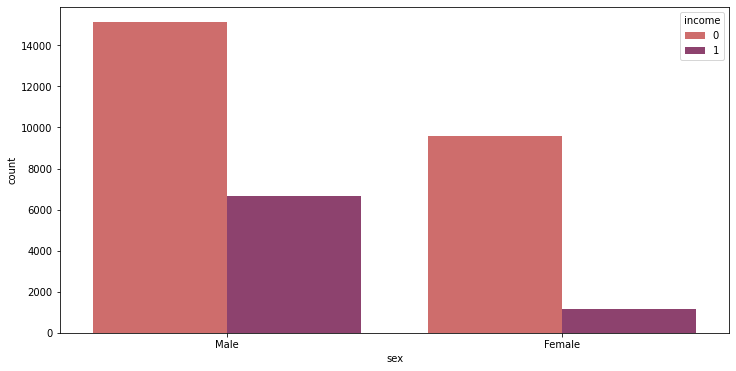

In [ ]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

ax = sns.countplot(x="sex", hue="income", data=train_data, palette = "flare")


### Relationship

##### Outcome:

More likely to earn >50k if you have a husband, while not in a family or a wife are close to equal. For those earning <=50K it is more likely to be the case if you have a husband or not-in-family. 

[[Text(0, 0, 'Husband'),
  Text(0, 0, 'Not-in-family'),
  Text(0, 0, 'Other-relative'),
  Text(0, 0, 'Own-child'),
  Text(0, 0, 'Unmarried'),
  Text(0, 0, 'Wife')]]

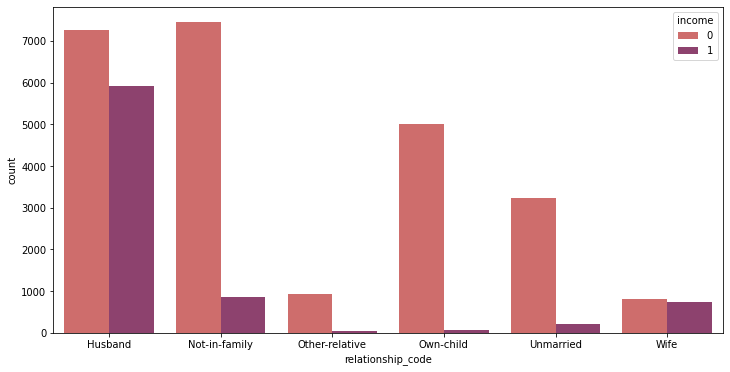

In [ ]:
train_data["relationship_code"] = train_data.relationship.astype('category').cat.codes
map_dict = sorted(dict(zip(train_data['relationship_code'], train_data['relationship'])).items())
labels = [i[1] for i in map_dict]

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

ax = sns.countplot(x="relationship_code", hue="income", data=train_data, palette = "flare")
ax.set(xticklabels=labels)
